In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spam7.csv')

In [3]:
df.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4601 non-null   int64  
 1   crl.tot     4601 non-null   int64  
 2   dollar      4601 non-null   float64
 3   bang        4601 non-null   float64
 4   money       4601 non-null   float64
 5   n000        4601 non-null   float64
 6   make        4601 non-null   float64
 7   yesno       4601 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 287.7+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'crl.tot', 'dollar', 'bang', 'money', 'n000', 'make',
       'yesno'],
      dtype='object')

In [6]:
df.yesno.value_counts()

n    2788
y    1813
Name: yesno, dtype: int64

In [7]:
df['spam'] = df.yesno.apply(lambda x: 1 if x=='y' else 0)

In [8]:
df.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [9]:
df.drop(['Unnamed: 0', 'yesno'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crl.tot  4601 non-null   int64  
 1   dollar   4601 non-null   float64
 2   bang     4601 non-null   float64
 3   money    4601 non-null   float64
 4   n000     4601 non-null   float64
 5   make     4601 non-null   float64
 6   spam     4601 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 251.7 KB


In [11]:
df.sample(5)

,crl.tot,dollar,bang,money,n000,make,spam
1615,228,0.000,0.000,0.00,0.00,0.0,1
4400,67,0.000,0.656,0.00,0.00,0.0,0
456,91,0.251,0.251,0.00,0.00,0.0,1
19,186,0.496,0.055,0.63,0.31,0.0,1
2059,71,0.000,0.000,0.00,0.00,0.0,0


In [12]:
X = df.drop('spam', axis=1)
y = df.spam

In [13]:
col_lst = list(X.columns)
col_lst

['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']

In [14]:
def multiply_columns(data):
    col_lst = list(data.columns)
    col_cnt = len(col_lst) - 1
    for ind1, col in enumerate(data.columns):
        #print(ind, col)
        for ind2 in range(ind1 + 1, col_cnt + 1):
            new_col = col_lst[ind1] + '_' + col_lst[ind2]
            print(new_col)
            data[new_col] = data[col_lst[ind1]]*data[col_lst[ind2]]

In [15]:
multiply_columns(X)

crl.tot_dollar
crl.tot_bang
crl.tot_money
crl.tot_n000
crl.tot_make
dollar_bang
dollar_money
dollar_n000
dollar_make
bang_money
bang_n000
bang_make
money_n000
money_make
n000_make


In [16]:
X.head()

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
clf = GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=100,
                                 max_depth=3,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 subsample=1,
                                 max_features=None,
                                 random_state=42)

In [19]:
clf.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
print(accuracy_score(y_test, clf.predict(X_test)))

0.8849077090119435


In [21]:
print("Accuracy score (test): {0:.3f}".format(clf.score(X_test, y_test)))

Accuracy score (test): 0.885


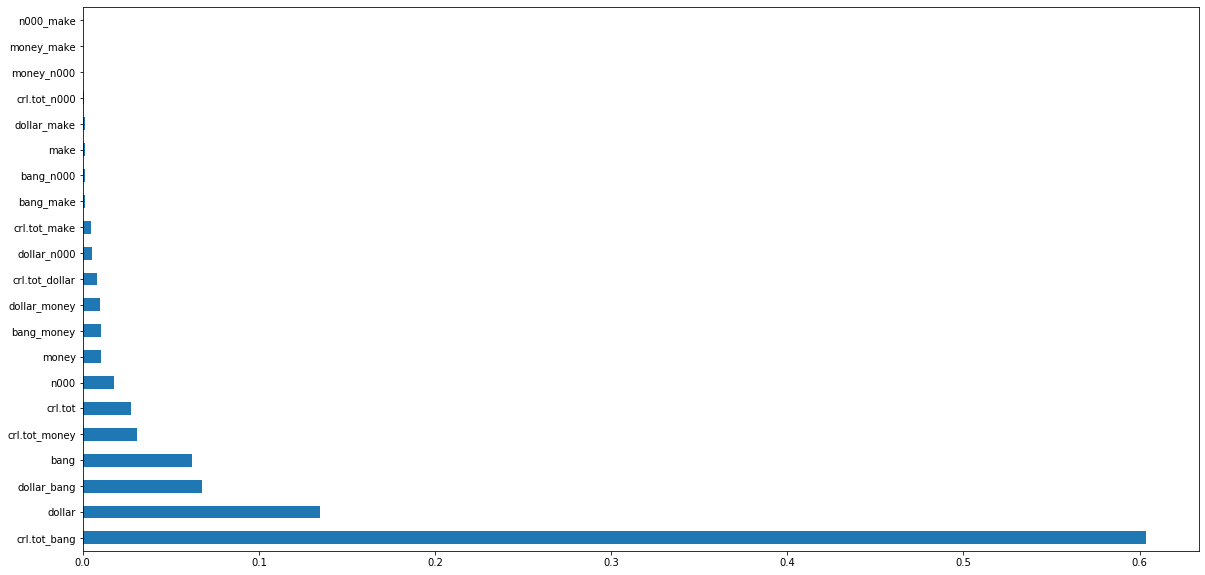

In [22]:
# Выведем самые важные признаки для GradientBoostingClassifier
plt.rcParams['figure.figsize'] = (20,10)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [23]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

In [24]:
gridsearch = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
clf = gridsearch.best_estimator_
##печатаем параметры
best_parameters = clf.get_params()
for param_name in sorted(best_parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
##печатаем метрики
print("Accuracy score (test): {0:.3f}".format(clf.score(X_test, y_test)))
# predicted = model.predict(X_test)
# probabilities = model.predict_proba(X_test)
# probabilities = probabilities[:,1]
# utils.print_classification_metrics(y_test, predicted, probabilities)

	ccp_alpha: 0.0
	criterion: 'friedman_mse'
	init: None
	learning_rate: 0.01
	loss: 'deviance'
	max_depth: 3
	max_features: None
	max_leaf_nodes: None
	min_impurity_decrease: 0.0
	min_impurity_split: None
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 1750
	n_iter_no_change: None
	presort: 'deprecated'
	random_state: 42
	subsample: 1
	tol: 0.0001
	validation_fraction: 0.1
	verbose: 0
	warm_start: False
Accuracy score (test): 0.861


In [27]:
print(accuracy_score(y_test, clf.predict(X_test)))

0.8610206297502715


In [26]:
param_grid = {'max_depth':list(range(5, 16))}

In [28]:
gridsearch = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
clf = gridsearch.best_estimator_
##печатаем параметры
best_parameters = clf.get_params()
for param_name in sorted(best_parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
##печатаем метрики
print("Accuracy score (test): {0:.3f}".format(clf.score(X_test, y_test)))

	ccp_alpha: 0.0
	criterion: 'friedman_mse'
	init: None
	learning_rate: 0.01
	loss: 'deviance'
	max_depth: 5
	max_features: None
	max_leaf_nodes: None
	min_impurity_decrease: 0.0
	min_impurity_split: None
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 1750
	n_iter_no_change: None
	presort: 'deprecated'
	random_state: 42
	subsample: 1
	tol: 0.0001
	validation_fraction: 0.1
	verbose: 0
	warm_start: False
Accuracy score (test): 0.865


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [],[],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight * incorrect)
        
        # Вычисляем вес нового алгоритма
        estimator_weight = np.log((1-estimator_error)/estimator_error) * learning_rate

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

In [33]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363
